## Problem 1

### 1.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

# get histogram of the image
def getHistogram(image):
    
    bins = np.zeros(256)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            bins[int(image[i][j])] += 1
            
    y = np.arange(len(bins))
    plt.bar(y, bins, color = 'g')
    plt.show()
    
    return bins

In [13]:
# get binary form of the image
def binarizeImg(image, T):
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] >= T:
                image[i][j] = 1
            else:
                image[i][j] = 0
                
    imgplot = plt.imshow(image, cmap = 'gray')
    return image

# to get the complement image
def getComplement(image):
    
    compImage = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j]:
                compImage[i][j] = 0
            else:
                compImage[i][j] = 1
                
    return compImage

In [14]:
def filter(image, i, j, s, n, case):
    
    if case == 'dilate':
        
        val = 0
        if s == 'cross':

            for row in range(-n, n + 1):
                if i - row >= 0 and i - row <= image.shape[0] - 1:
                    val = val or image[i - row][j]

            for col in range(-n, n + 1):
                if j - col >= 0 and j - col <= image.shape[1] - 1:
                    val = val or image[i][j - col]

        return val
    
    elif case == 'erode':
        
        val = 1
        if s == 'cross':

            for row in range(-n, n + 1):
                if i - row >= 0 and i - row <= image.shape[0] - 1:
                    val = val and image[i - row][j]

            for col in range(-n, n + 1):
                if j - col >= 0 and j - col <= image.shape[1] - 1:
                    val = val and image[i][j - col]

        return val
    
    elif case == 'median':
        
        if s == 'cross':
            
            count = [0, 0]
            for row in range(-n, n + 1):
                if i - row >= 0 and i - row <= image.shape[0] - 1:
                    count[int(image[i - row][j])] += 1
                    
                elif i - row < 0:
                    count[int(image[0][j])] += 1
                
                else:
                    count[int(image[image.shape[0] - 1][j])] += 1
                    

            for col in range(-n, n + 1):
                if j - col >= 0 and j - col <= image.shape[1] - 1:
                    count[int(image[i][j - col])] += 1
                
                elif j - col < 0:
                    count[int(image[i][0])] += 1
                
                else:
                    count[int(image[i][image.shape[1] - 1])] += 1
        
        count[int(image[i][j])] -= 1

        return count.index(max(count))

In [15]:
def function(image, type_):
    
    outputImg = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            outputImg[i][j] = filter(image, i, j, 'cross', 2, type_)
        
    return outputImg

In [16]:
# reading the image
# 2020 September 07: The Milky Way over St Michaels Mount
# link : https://apod.nasa.gov/apod/ap200907.html
Milky = 'The Milky Way over St Michaels Mount.jpg'

imgMilky = Image.open(Milky)
imgMilky = np.array(imgMilky.convert('L'))

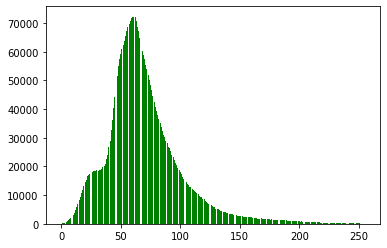

In [17]:
histMilky = getHistogram(imgMilky)

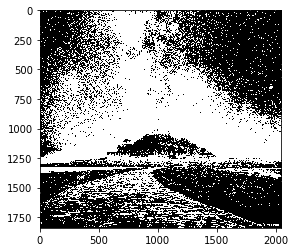

In [18]:
binaryMilky = binarizeImg(imgMilky.copy(), 65)
compMilky = getComplement(binaryMilky)

In [19]:
# Erode
imgErode = function(compMilky, 'erode')
imgErode = getComplement(imgErode)

# Dilate
imgDilate = function(binaryMilky, 'dilate')

if (imgErode == imgDilate).all():
    print('Hence, DILATE is the dual of ERODE with respect to complementation')
else:
    print('NO')

Hence, DILATE is the dual of ERODE with respect to complementation


### 2.

In [20]:
# Dilate
imgDilate = function(compMilky, 'dilate')
imgDilate = getComplement(imgDilate)

# Erode
imgErode = function(binaryMilky, 'erode')

if (imgErode == imgDilate).all():
    print('Hence, ERODE is the dual of DILATE with respect to complementation')
else:
    print('NO')

Hence, ERODE is the dual of DILATE with respect to complementation


### 3.

In [21]:
# Median
imgMedian = function(compMilky, 'median')
imgMedian = getComplement(imgMedian)

# Median
imgMedian_ = function(binaryMilky, 'median')

if (imgMedian == imgMedian_).all():
    print('Hence,  MEDIAN is its own dual with respect to complementation')
else:
    print('NO')

Hence,  MEDIAN is its own dual with respect to complementation


## Problem 2

In [79]:
def LinearPointOp(image, P, L):
    
    outputImg = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            outputImg[i][j] = int(P * image[i][j] + L)
            outputImg[i][j] = min(outputImg[i][j], 255)
            
    return outputImg

### 1.a

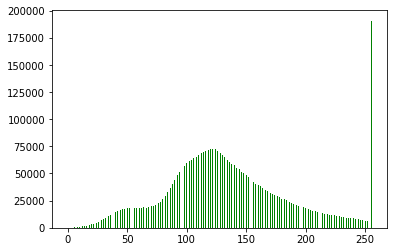

In [33]:
# J = P.I :: P - 2 and L - 0
imgLinearPoint = LinearPointOp(imgMilky, 2, 0)
histMilkyLinearPoint = getHistogram(imgLinearPoint)

In [37]:
'''In the above case we only have the scaling operation, so we have got a stretched version of the original histogram with P = 2 and L = 0'''

'In the above case we only have the scaling operation, so we have got a stretched version of the original histogram with P = 2 and L = 0'

### 1.b

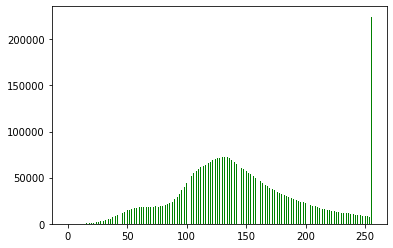

In [36]:
# J = P.I :: P - 2 and L - 10
imgLinearPoint = LinearPointOp(imgMilky, 2, 10)
histMilkyLinearPoint = getHistogram(imgLinearPoint)

In [38]:
'''In the above case we have both the scaling and offset operation, so we have got a stretched and shifted version of the original histogram with P = 2 and L = 10'''

'In the above case we have both the scaling and offset operation, so we have got a stretched and shifted version of the original histogram with P = 2 and L = 10'

### 2.

In [123]:
# reading the image
# 2016 July 20: Dark Dunes on Mars
# link : https://apod.nasa.gov/apod/ap160720.html
Mars = 'Dark Dunes on Mars.jpg'

imgMars = Image.open(Mars)
imgMars = np.array(imgMars.convert('L'))

In [124]:
def FSCS(image, image_):
    A = np.amin(image)
    B = np.amax(image)

    print('Minimum pixel value before applying FSCS :', A)
    print('Maximum pixel value before applying FSCS :', B)
    print('-' * 60)
    print()

    K = 256
    
    # P
    P = (K - 1)/(B - A)

    # L
    L = (-A) * P

    print('Histogram of the image before applying FSCS')
    histMars = getHistogram(image_)

    imgFSCS = LinearPointOp(image, P, L)
    print('Histogram of the image after applying FSCS')
    histMilkyLinearPoint = getHistogram(imgFSCS)
    print('-' * 60)
    print()
    
    
    A = np.amin(imgFSCS)
    B = np.amax(imgFSCS)

    print('Minimum pixel value after applying FSCS :', A)
    print('Maximum pixel value after applying FSCS :', B)
    
    return imgFSCS

Minimum pixel value before applying FSCS : 0
Maximum pixel value before applying FSCS : 240
------------------------------------------------------------

Histogram of the image before applying FSCS


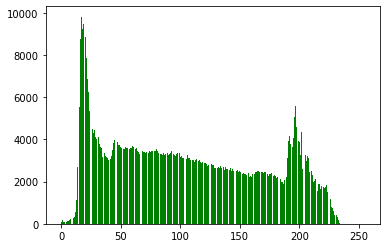

Histogram of the image after applying FSCS


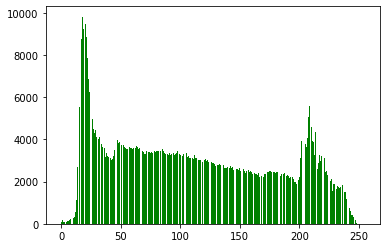

------------------------------------------------------------

Minimum pixel value after applying FSCS : 0.0
Maximum pixel value after applying FSCS : 255.0


In [125]:
imgFSCS = FSCS(imgMars, imgMars)

In [126]:
'''By applying the FSCS we have used the unused bit-values and we can observe it from our maximum pixel value changed from 240 to 255'''

'By applying the FSCS we have used the unused bit-values and we can observe it from our maximum pixel value changed from 240 to 255'

### 3.

Minimum pixel value before applying FSCS : 0.0
Maximum pixel value before applying FSCS : 5.484
------------------------------------------------------------

Histogram of the image before applying FSCS


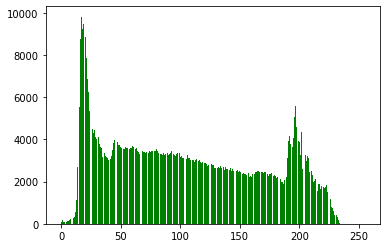

Histogram of the image after applying FSCS


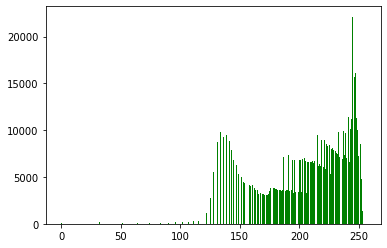

------------------------------------------------------------

Minimum pixel value after applying FSCS : 0.0
Maximum pixel value after applying FSCS : 255.0


In [128]:
imgLog = np.log(1  + imgMars)
imgLog = FSCS(imgLog, imgMars)

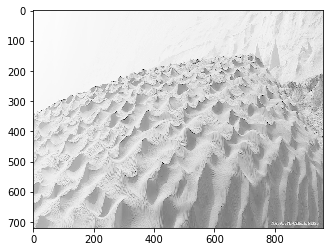

In [129]:
imgplot = plt.imshow(imgLog, cmap = 'gray')

### 4.

Minimum pixel value before applying FSCS : 0.00013599537037037036
Maximum pixel value before applying FSCS : 1.0000000000000004
------------------------------------------------------------

Histogram of the image before applying FSCS


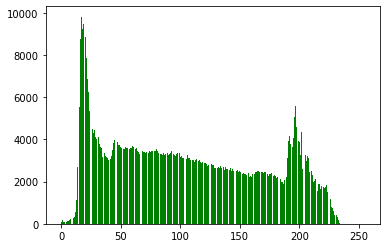

Histogram of the image after applying FSCS


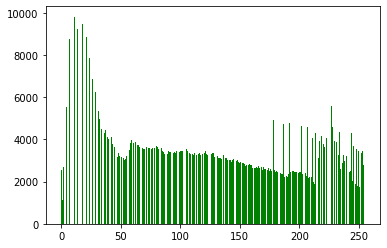

------------------------------------------------------------

Minimum pixel value after applying FSCS : 0.0
Maximum pixel value after applying FSCS : 254.0


In [133]:
bins = np.zeros(256)
    
for i in range(imgMars.shape[0]):
    for j in range(imgMars.shape[1]):
        bins[int(imgMars[i][j])] += 1

bins /= (imgMars.shape[0] * imgMars.shape[1])
for ind, val in enumerate(bins):
    if ind != 0:
        bins[ind] += bins[ind - 1]

img = np.zeros(imgMars.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = bins[imgMars[i][j]]
        
img = FSCS(img, imgMars)

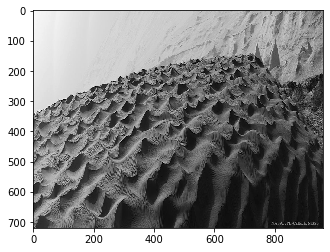

In [134]:
imgplot = plt.imshow(imgMars, cmap = 'gray')

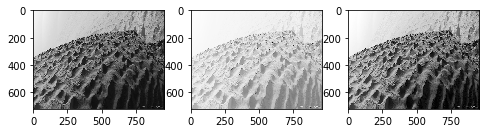

In [135]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 8))
ax[0].imshow(imgFSCS, cmap = 'gray')
ax[1].imshow(imgLog, cmap = 'gray')
ax[2].imshow(img, cmap = 'gray')

In [ ]:
'''We can see in the log range compression that bright intensities compressed heavily causing faint details to
appear'''

## Problem 3

### 1.

In [142]:
def zoomNearestNeighbor(image, magni):

    x = int(magni * image.shape[0])
    y = int(magni * image.shape[1])
    imgZoom = np.zeros((x, y))


    for i in range(imgZoom.shape[0]):
        for j in range(imgZoom.shape[1]):

            # row wise
            x = math.ceil((i + 1)/(magni)) - 1

            # column wise
            y = math.ceil((j + 1)/(magni)) - 1

            imgZoom[i][j] = image[x][y]
    
    return imgZoom

In [143]:
zoomMilky = zoomNearestNeighbor(imgMilky, 1.5)
zoomMars = zoomNearestNeighbor(imgMars, 1.5)

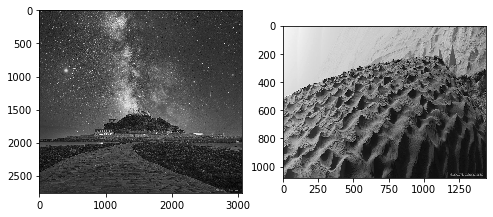

In [144]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 8))
ax[0].imshow(zoomMilky, cmap = 'gray')
ax[1].imshow(zoomMars, cmap = 'gray')

### 2.

In [148]:
def func(image, i, j):
    
    r = image.shape[0]
    c = image.shape[1]
    
    val = [0, 0, 0, 0]
    mat = np.zeros((4, 4))
    
    val[0] = image[i][j]
    mat[0] = np.array([1, i, j, i * j])        
    
    if i + 1 < r:
        val[1] = image[i + 1][j]
        mat[1] = np.array([1, i + 1, j, (i + 1) * j])
    
    else:
        val[1] = image[i - 1][j]
        mat[1] = np.array([1, i - 1, j, (i - 1) * j])
        
    if j + 1 < r:
        val[2] = image[i][j + 1]
        mat[2] = np.array([1, i, j + 1, (j + 1) * i])
    
    else:
        val[2] = image[i][j - 1]
        mat[2] = np.array([1, i, j - 1, (j - 1) * i])
    
    if i + 1 < r and j + 1 < c:
        val[3] = image[i + 1][j + 1]
        mat[3] = np.array([1, i + 1, j + 1, (i + 1) * (j + 1)])
        
    elif i + 1 < r:
        val[3] = image[i + 1][j - 1]
        mat[3] = np.array([1, i + 1, j - 1, (i + 1) * (j - 1)])
        
    elif j + 1 < c:
        val[3] = image[i - 1][j + 1]
        mat[3] = np.array([1, i - 1, j + 1, (i - 1) * (j + 1)])
        
    else:
        val[3] = image[i - 1][j - 1]
        mat[3] = np.array([1, i - 1, j - 1, (i - 1) * (j - 1)])
        
    return val, mat

def bilinearInterpolation(image, magni):

    x = int(magni * image.shape[0])
    y = int(magni * image.shape[1])
    imgZoom = np.zeros((x, y))


    for i in range(imgZoom.shape[0]):
        for j in range(imgZoom.shape[1]):

            # row wise
            x = math.ceil((i + 1)/(magni)) - 1

            # column wise
            y = math.ceil((j + 1)/(magni)) - 1
            
            val, mat = func(imgMars, x, y)
                
            val = np.array(val)
            sol = np.matmul(np.linalg.pinv(mat), val)
            imgZoom[i][j] = max(sol[0] + sol[1] * x + sol[2] * y + sol[3] * x * y, 0)
            imgZoom[i][j] = min(imgZoom[i][j] , 255)
            
    return imgZoom

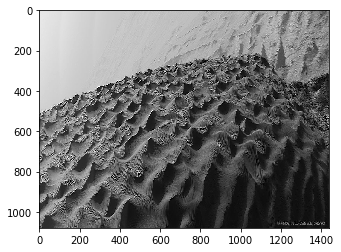

In [157]:
# considered the original pixel values for constructing the zoomed image
imgplot = plt.imshow(zoomMars, cmap = 'gray')